# Heiken Ashi

https://www.investopedia.com/trading/heikin-ashi-better-candlestick/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore") 

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^nsei'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [3]:
def Heiken_Ashi(df):
    df['HA_Close']=(df['Open']+ df['High']+ df['Low']+ df['Close'])/4
    df['HA_Open']=(df['Open']+df['Close'])/2   
    
    for i in range(1, len(df)):
        df['HA_Open'][i]=(df['HA_Open'][i-1]+df['HA_Close'][i-1])/2 
    df['HA_High']=df[['HA_Open','HA_Close','High']].max(axis=1)
    df['HA_Low']=df[['HA_Open','HA_Close','Low']].min(axis=1)
    return

Heiken_Ashi(df)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,HA_Close,HA_Open,HA_High,HA_Low
Date,,,,,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100,12193.037598,12192.325195,12222.200195,12165.299805
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700,12241.475098,12192.681396,12289.900391,12192.681396
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800,12236.174805,12217.078247,12265.599609,12191.349609
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500,12079.237305,12226.626526,12226.626526,11974.200195
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800,12072.387451,12152.931915,12152.931915,12005.349609


In [5]:
HA = df[['HA_Open','HA_High','HA_Low','HA_Close', 'Volume']]

In [6]:
HA.head()

,HA_Open,HA_High,HA_Low,HA_Close,Volume
Date,,,,,
2020-01-01 00:00:00+05:30,12192.325195,12222.200195,12165.299805,12193.037598,304100
2020-01-02 00:00:00+05:30,12192.681396,12289.900391,12192.681396,12241.475098,407700
2020-01-03 00:00:00+05:30,12217.078247,12265.599609,12191.349609,12236.174805,428800
2020-01-06 00:00:00+05:30,12226.626526,12226.626526,11974.200195,12079.237305,396500
2020-01-07 00:00:00+05:30,12152.931915,12152.931915,12005.349609,12072.387451,447800


In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = HA.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,HA_Open,HA_High,HA_Low,HA_Close,Volume
0,18261.770833,12192.325195,12222.200195,12165.299805,12193.037598,304100
1,18262.770833,12192.681396,12289.900391,12192.681396,12241.475098,407700
2,18263.770833,12217.078247,12265.599609,12191.349609,12236.174805,428800
3,18266.770833,12226.626526,12226.626526,11974.200195,12079.237305,396500
4,18267.770833,12152.931915,12152.931915,12005.349609,12072.387451,447800


Text(0.5, 0, 'Date')

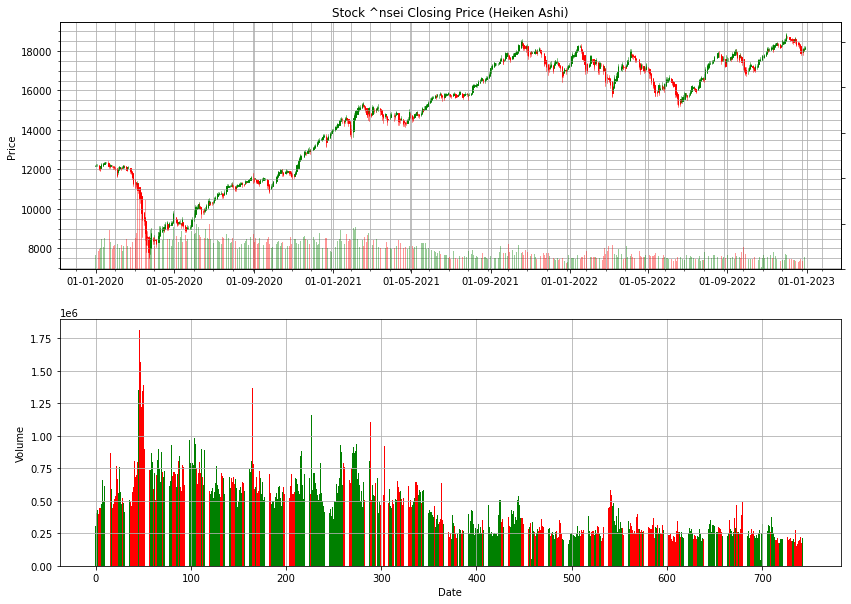

In [10]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
dfc['VolumePositive'] = dfc['HA_Open'] < dfc['HA_Close']
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price (Heiken Ashi)')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.bar(dfc.index, dfc['Volume'], color=dfc.VolumePositive.map({True: 'g', False: 'r'}))
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')

## Compare Heiken Ashi and Candlesticks

In [12]:
from matplotlib import dates as mdates
import datetime as dt

cs = df.reset_index()
cs['Date'] = pd.to_datetime(cs['Date'])
cs['Date'] = cs['Date'].apply(mdates.date2num)
cs.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HA_Close,HA_Open,HA_High,HA_Low
0,18261.770833,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100,12193.037598,12192.325195,12222.200195,12165.299805
1,18262.770833,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700,12241.475098,12192.681396,12289.900391,12192.681396
2,18263.770833,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800,12236.174805,12217.078247,12265.599609,12191.349609
3,18266.770833,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500,12079.237305,12226.626526,12226.626526,11974.200195
4,18267.770833,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800,12072.387451,12152.931915,12152.931915,12005.349609


In [13]:
cs = cs[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

Text(0.5, 0, 'Date')

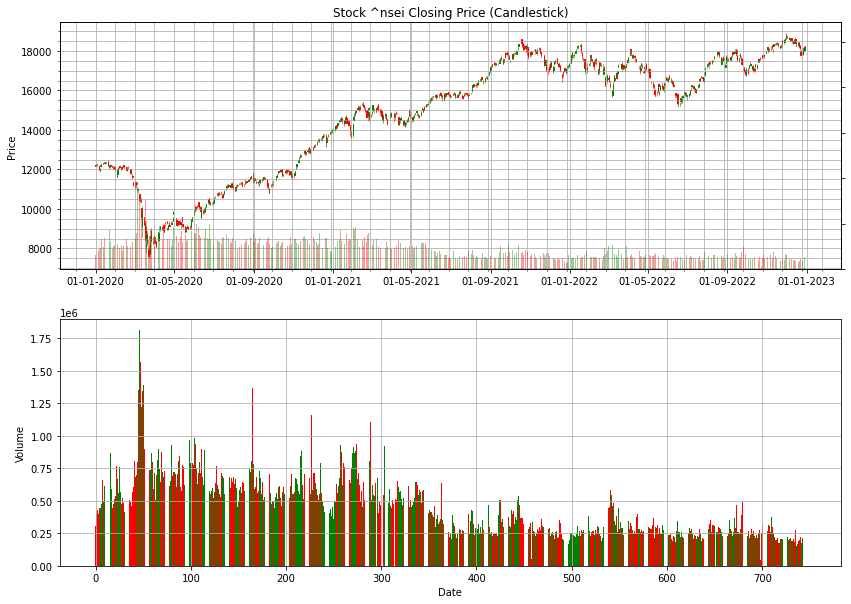

In [14]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,cs.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
cs['VolumePositive'] = cs['Open'] < cs['Close']
colors = cs.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(cs.Date, cs['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*cs.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price (Candlestick)')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.bar(cs.index, cs['Volume'], color=cs.VolumePositive.map({True: 'g', False: 'r'}))
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')

Text(0.5, 0, 'Date')

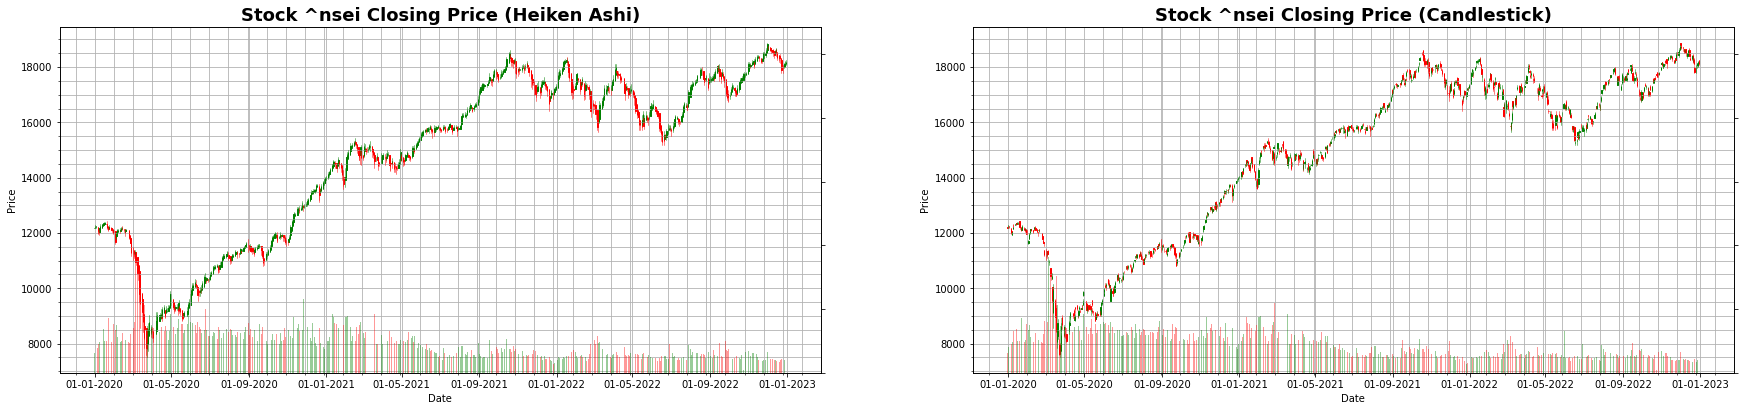

In [15]:
fig = plt.figure(figsize=(30,14))
ax1 = plt.subplot(2, 2, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
dfc['VolumePositive'] = dfc['HA_Open'] < dfc['HA_Close']
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price (Heiken Ashi)', fontweight="bold", fontsize=18)
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax2 = plt.subplot(2, 2, 2)
candlestick_ohlc(ax2,cs.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax2.xaxis_date()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.grid(True, which='both')
ax2.minorticks_on()
ax2v = ax2.twinx()
cs['VolumePositive'] = cs['Open'] < cs['Close']
colors = cs.VolumePositive.map({True: 'g', False: 'r'})
ax2v.bar(cs.Date, cs['Volume'], color=colors, alpha=0.4)
ax2v.axes.yaxis.set_ticklabels([])
ax2v.set_ylim(0, 3*cs.Volume.max())
ax2.set_title('Stock '+ symbol +' Closing Price (Candlestick)', fontweight="bold", fontsize=18)
ax2.set_ylabel('Price')
ax2.set_xlabel('Date')